### 검증손실, 드롭아웃, 저장-복원, 콜백
* 검증손실
    * 학습데이터와 검증데이터의 학습률을 비교해가며 적정선을 찾을 때 사용하는 방법
* 드롭아웃
    * 과적합을 줄이기 위한 방법
    * 신경망에만 있는 방법
    * 은닉층에 있는 특정 속성 값을 임의로 계산하지 않는 방법
        - 속성값은 랜덤하게 빠지게 되어 계산된다
    * 드롭아웃은 은닉층 다음에 추가하여야 한다. 0.2를 넣으면 100개중 20%를 사용하지 않는다는 의미
    * 사용자가 할 것은 전체 속성 중 몇 %를 드롭아웃 시킬지만 결정
* 모델 저장과 복원
    * 좋은 모델이 만들어 졌다면 해당 모델을 파일로 저장하여 사용하는 방법
    * 학습한 내용을 파일로 저장하여 사용하면 다시 학습하지 않아도 된다
    * h5
        * H5파일은 HDF(Hierarchical Data Format)로 저장된 데이터 파일이다.
        * 과학 데이터의 다차원 배열을 포함한다.
        * H5파일은 항공 우주, 물리, 공학, 금융, 학술 연구, 유전체학, 천문학, 전자 기기 및 의료 분야에서 일반적으로 사용된다
* 콜백
    * 모델 훈련 과정 중 가장 낮은 손실값을 갖는 모델을 자동으로 저장해 준다.
    * epoch의 값을 충분히 크게 주고 사용하면 된다.
    * ModelCheckpoint에 지정한 파일로 자동으로 저장 된다.

In [1]:
from keras.datasets import fashion_mnist

(train_input, train_target),(test_input, test_target) =\
        fashion_mnist.load_data()

In [2]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)
(train_input,train_target)
(test_input, test_target)
train_input[0]

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

### 이미지 불러오기

In [3]:
import numpy as np
np.unique(train_target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

  9   0   0   3   0   2   7   2   5   5 

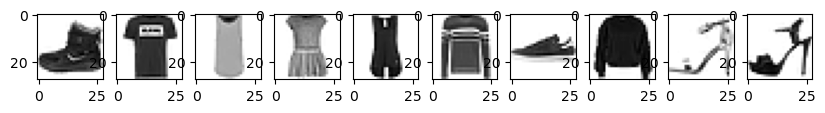

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,10,figsize=(10,10))

for i in range(10):
    ax[i].imshow(train_input[i],cmap='gray_r')
    print(" ", train_target[i], end=" ")

### 스케일링
* 이미지 색깔 숫자 : 0~255

In [5]:
train_scaler = train_input / 255.0
train_scaler[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
                train_test_split(train_scaler, train_target, test_size=0.2)

In [7]:
X_train.ndim

3

### 모델 생성
* DNN은 1차원 데이터로 값을 넣어주어야 한다. 현재 가로, 세로, 데이터 수 총 3차원 형태로 되어 있다
* Flatten값은 2차원을 1차원으로 축소해주는 역할을 한다.
* 28 x 28형태의 가로, 세로의 2차원 값을 하나의 차원인 784개의 1차원 형태로 변환해 주는 역할을 하게된다

In [8]:
from keras.layers import Flatten
import numpy as np
X = np.array([[1,2,3],[6,7,8]])
X.ndim,X


(2,
 array([[1, 2, 3],
        [6, 7, 8]]))

In [9]:
test = Flatten(input_shape=(2,2))
test

In [10]:
X = X.flatten()
X.ndim, X

(1, array([1, 2, 3, 6, 7, 8]))

In [11]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=(28,28,1)))

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [12]:
model.compile(optimizer='adam',metrics='acc',loss='sparse_categorical_crossentropy')


### 학습

In [13]:
h = model.fit(X_train, y_train, epochs = 20, batch_size=100)

Epoch 1/20
480/480 [==============================] - 1s 2ms/step - loss: 0.6144 - acc: 0.7856
Epoch 2/20
480/480 [==============================] - 1s 2ms/step - loss: 0.4222 - acc: 0.8506
Epoch 3/20
480/480 [==============================] - 1s 1ms/step - loss: 0.3770 - acc: 0.8658
Epoch 4/20
480/480 [==============================] - 1s 1ms/step - loss: 0.3556 - acc: 0.8730
Epoch 5/20
480/480 [==============================] - 1s 1ms/step - loss: 0.3348 - acc: 0.8792
Epoch 6/20
480/480 [==============================] - 1s 1ms/step - loss: 0.3206 - acc: 0.8835
Epoch 7/20
480/480 [==============================] - 1s 1ms/step - loss: 0.3088 - acc: 0.8882
Epoch 8/20
480/480 [==============================] - 1s 1ms/step - loss: 0.2967 - acc: 0.8909
Epoch 9/20
480/480 [==============================] - 1s 1ms/step - loss: 0.2880 - acc: 0.8935
Epoch 10/20
480/480 [==============================] - 1s 1ms/step - loss: 0.2791 - acc: 0.8983
Epoch 11/20
480/480 [============================

### 손실 곡선
* 학습 데이터의 정확도 또는 손실되는 값을 그래프로 표현

In [14]:
h.history.keys()

dict_keys(['loss', 'acc'])

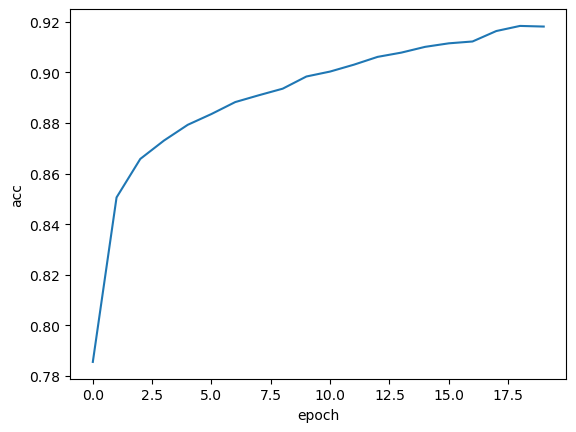

In [15]:
plt.plot(h.history['acc'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

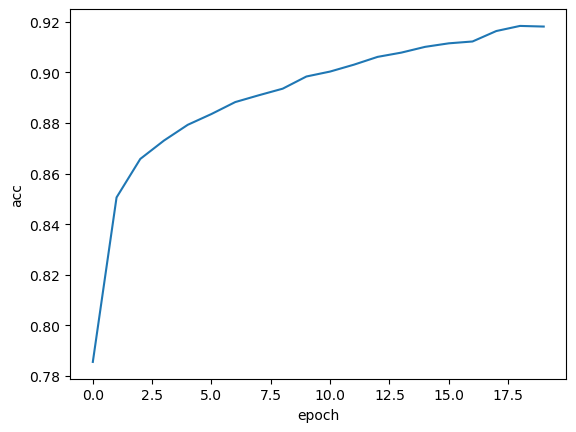

In [16]:
plt.plot(h.history['acc'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [17]:
model = Sequential()
model.add(Flatten(input_shape=(28,28,1)))

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',metrics='acc',loss='sparse_categorical_crossentropy')

In [18]:
h = model.fit(X_train, y_train, epochs=20, batch_size=100, validation_split=0.2)

Epoch 1/20
384/384 [==============================] - 1s 2ms/step - loss: 0.6541 - acc: 0.7798 - val_loss: 0.4585 - val_acc: 0.8467
Epoch 2/20
384/384 [==============================] - 1s 2ms/step - loss: 0.4389 - acc: 0.8466 - val_loss: 0.4093 - val_acc: 0.8564
Epoch 3/20
384/384 [==============================] - 1s 2ms/step - loss: 0.3960 - acc: 0.8584 - val_loss: 0.3889 - val_acc: 0.8652
Epoch 4/20
384/384 [==============================] - 1s 2ms/step - loss: 0.3702 - acc: 0.8668 - val_loss: 0.3826 - val_acc: 0.8647
Epoch 5/20
384/384 [==============================] - 1s 2ms/step - loss: 0.3534 - acc: 0.8714 - val_loss: 0.3596 - val_acc: 0.8724
Epoch 6/20
384/384 [==============================] - 1s 2ms/step - loss: 0.3369 - acc: 0.8783 - val_loss: 0.3796 - val_acc: 0.8660
Epoch 7/20
384/384 [==============================] - 1s 2ms/step - loss: 0.3219 - acc: 0.8823 - val_loss: 0.3592 - val_acc: 0.8709
Epoch 8/20
384/384 [==============================] - 1s 2ms/step - loss: 0.

In [19]:
h.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### 검증손실
* 학습데이터와 검증데이터의 학습률을 비교해가며 적정선을 찾을 때 사용하는 방법

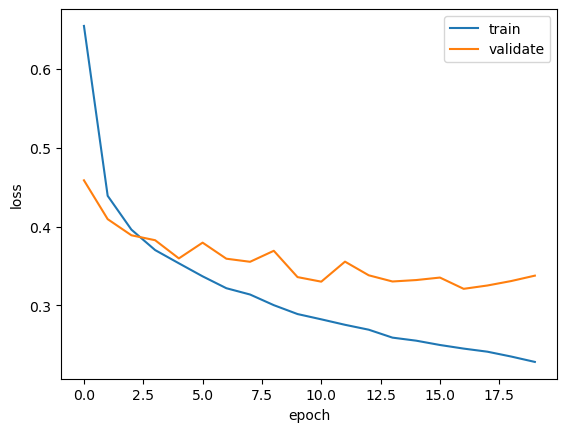

In [20]:
plt.plot( h.history['loss'])
plt.plot( h.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['train','validate'])

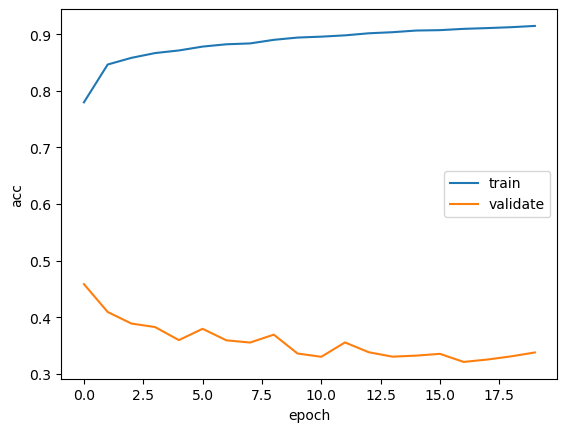

In [21]:
plt.plot( h.history['acc'])
plt.plot( h.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('acc')

plt.legend(['train','validate'])

### 드롭아웃
* 과접합 방지

In [22]:
from keras.layers import Dropout

model = Sequential()
model.add( Flatten(input_shape=(28,28,1)))
model.add( Dense(64,activation='relu'))

model.add(Dropout(0.2))# 20 %랜덤하게 제외
model.add( Dense(32,activation='relu'))
# model.add(Dropout(0.2))
model.add( Dense(10,activation='softmax'))

model.compile(optimizer='adam',metrics='acc',loss='sparse_categorical_crossentropy')

In [23]:
h = model.fit(X_train, y_train, epochs=20, batch_size=100,
             validation_split=0.2)

Epoch 1/20
384/384 [==============================] - 1s 2ms/step - loss: 0.7819 - acc: 0.7236 - val_loss: 0.4894 - val_acc: 0.8205
Epoch 2/20
384/384 [==============================] - 1s 2ms/step - loss: 0.4979 - acc: 0.8251 - val_loss: 0.4205 - val_acc: 0.8502
Epoch 3/20
384/384 [==============================] - 1s 2ms/step - loss: 0.4437 - acc: 0.8395 - val_loss: 0.3963 - val_acc: 0.8586
Epoch 4/20
384/384 [==============================] - 1s 2ms/step - loss: 0.4113 - acc: 0.8515 - val_loss: 0.3784 - val_acc: 0.8631
Epoch 5/20
384/384 [==============================] - 1s 2ms/step - loss: 0.3945 - acc: 0.8572 - val_loss: 0.3697 - val_acc: 0.8640
Epoch 6/20
384/384 [==============================] - 1s 2ms/step - loss: 0.3799 - acc: 0.8602 - val_loss: 0.3484 - val_acc: 0.8760
Epoch 7/20
384/384 [==============================] - 1s 2ms/step - loss: 0.3635 - acc: 0.8668 - val_loss: 0.3495 - val_acc: 0.8744
Epoch 8/20
384/384 [==============================] - 1s 2ms/step - loss: 0.

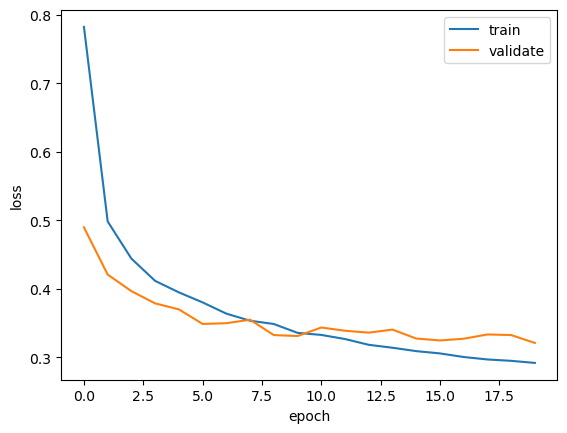

In [24]:
plt.plot( h.history['loss'])
plt.plot( h.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['train', 'validate'])

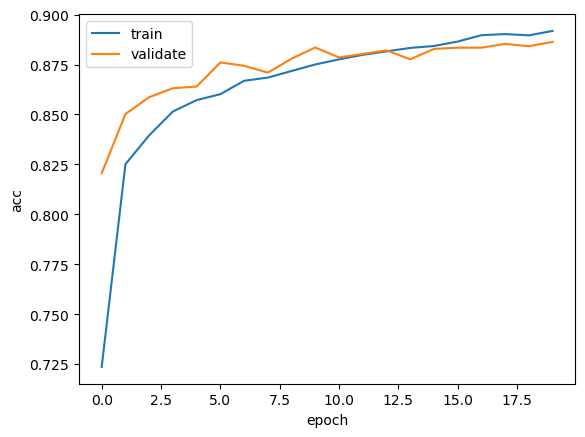

In [25]:

plt.plot( h.history['acc'])
plt.plot( h.history['val_acc'])

plt.xlabel('epoch')
plt.ylabel('acc')

plt.legend(['train', 'validate'])

### 모델저장과 복원 

In [26]:
model.save('test-model.h5')

In [27]:
from keras.models import load_model

m= load_model('test-model.h5')

In [28]:
np.set_printoptions(suppress=True)
pred = m.predict(X_test)
pred

375/375 [==============================] - 0s 896us/step


array([[0.00000001, 0.9999999 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00004166, 0.        , 0.00338877, ..., 0.        , 0.00000168,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00002966, 0.        ,
        0.9999684 ],
       ...,
       [0.00000759, 0.        , 0.0000002 , ..., 0.        , 0.9999908 ,
        0.00000002],
       [0.00037156, 0.00000001, 0.00337413, ..., 0.        , 0.00000823,
        0.        ],
       [0.0000001 , 0.        , 0.00000009, ..., 0.00000407, 0.00000054,
        0.        ]], dtype=float32)

### 콜백
* 최적의 모델을 파일로 저장해준다

In [29]:
from keras.callbacks import ModelCheckpoint

callback = ModelCheckpoint('new_file.h5')

In [30]:
model.fit(X_train, y_train, epochs=20,batch_size=100,
         validation_split=0.2, callbacks=callback)

Epoch 1/20
384/384 [==============================] - 1s 2ms/step - loss: 0.2830 - acc: 0.8931 - val_loss: 0.3208 - val_acc: 0.8848
Epoch 2/20
384/384 [==============================] - 1s 2ms/step - loss: 0.2815 - acc: 0.8923 - val_loss: 0.3139 - val_acc: 0.8899
Epoch 3/20
384/384 [==============================] - 1s 2ms/step - loss: 0.2774 - acc: 0.8973 - val_loss: 0.3185 - val_acc: 0.8866
Epoch 4/20
384/384 [==============================] - 1s 2ms/step - loss: 0.2757 - acc: 0.8961 - val_loss: 0.3243 - val_acc: 0.8829
Epoch 5/20
384/384 [==============================] - 1s 2ms/step - loss: 0.2760 - acc: 0.8961 - val_loss: 0.3253 - val_acc: 0.8891
Epoch 6/20
384/384 [==============================] - 1s 2ms/step - loss: 0.2729 - acc: 0.8965 - val_loss: 0.3299 - val_acc: 0.8861
Epoch 7/20
384/384 [==============================] - 1s 2ms/step - loss: 0.2670 - acc: 0.9008 - val_loss: 0.3232 - val_acc: 0.8867
Epoch 8/20
384/384 [==============================] - 1s 2ms/step - loss: 0.

In [31]:
m = load_model('new_file.h5')

In [32]:
pred = np.argmax(m.predict(X_test), axis=1)
np.mean(y_test==pred)

375/375 [==============================] - 0s 935us/step


0.8839166666666667